In [ ]:
# lib installations:
!pip install scikeras
!pip install tensorflow
!pip install seaborn

In [ ]:
# imports and constants:
import pandas as pd
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scikeras.wrappers import KerasClassifier
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from functools import partial

RANDOM_SEED = 42

In [ ]:
# fetch dataset from kagger to env:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

100%|██████████| 172k/172k [00:00<00:00, 49.0MB/s]

Extracting files...


In [ ]:
# show original df:
file_name = os.listdir(path)[0]
original_df = pd.read_csv(os.path.join(path, file_name))
df = original_df.copy()
print(original_df.shape)
original_df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Step 1: Overview of the dataset
print("Dataset Shape:", original_df.shape)
print("Columns and Data Types:\n", original_df.info())
print("\nMissing Values:\n", original_df.isnull().sum())
print("\nDuplicate Rows:", original_df.duplicated().sum())

Dataset Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


<ipython-input-34-6e1f40729a48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


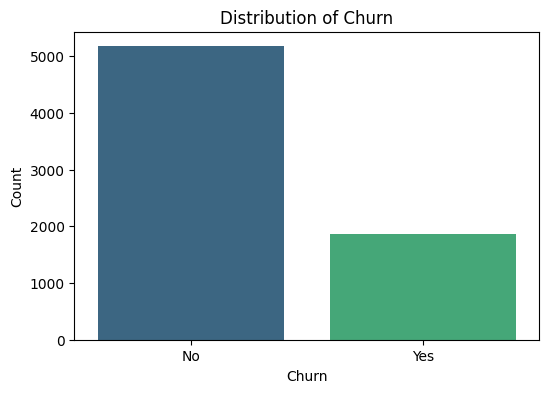

In [ ]:
# Distribution of target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

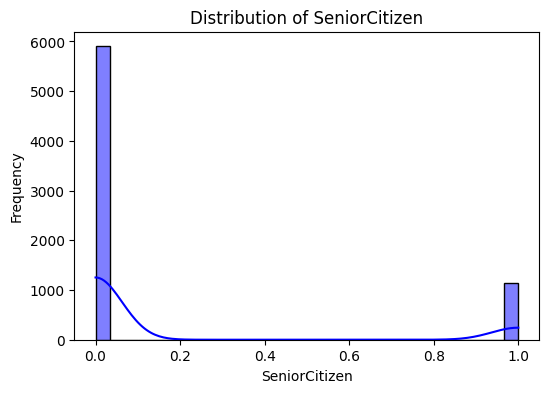

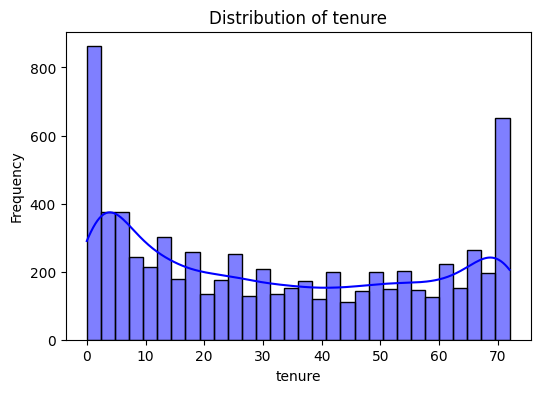

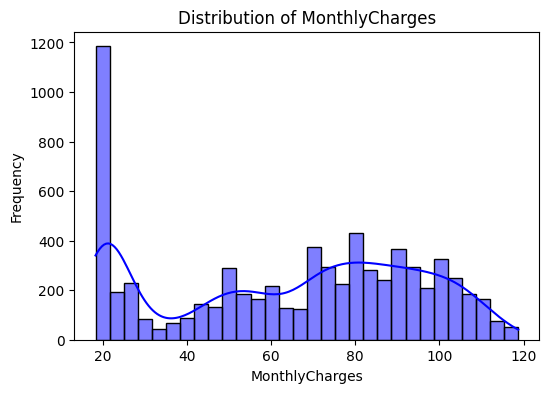

In [ ]:
# Numerical features distribution
numerical_columns = df.select_dtypes(include='number').columns

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


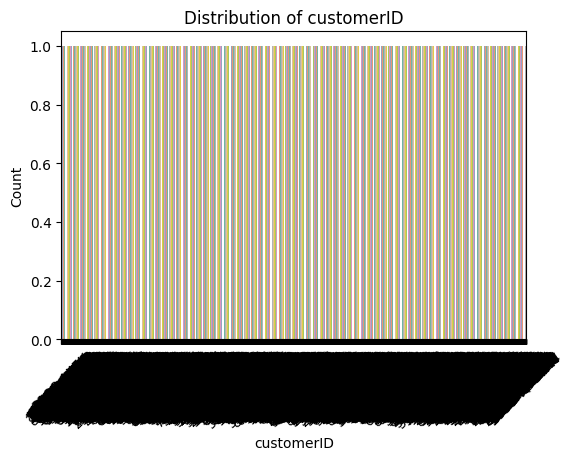

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


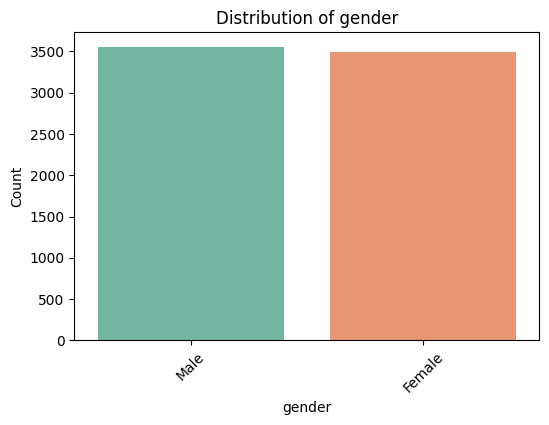

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


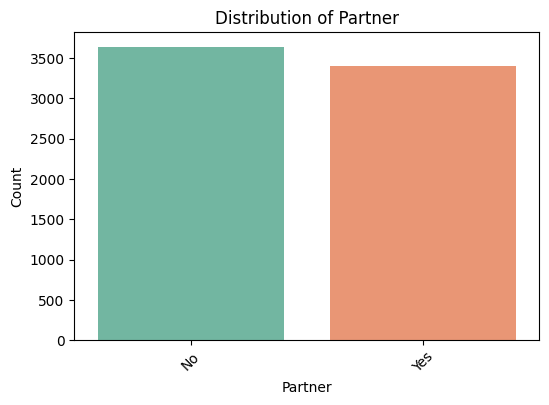

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


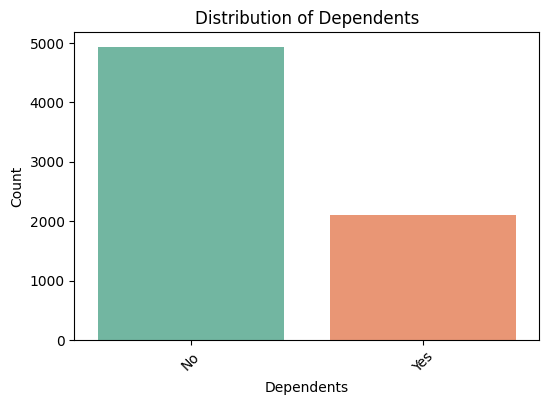

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


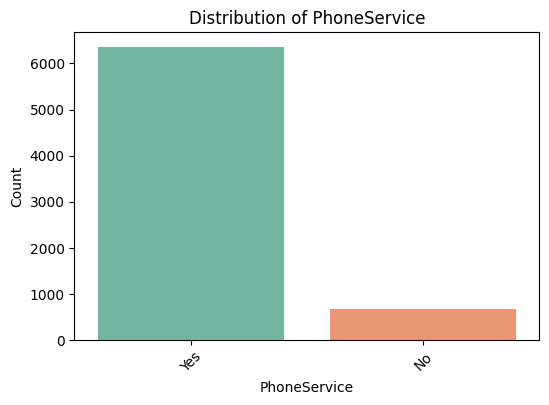

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


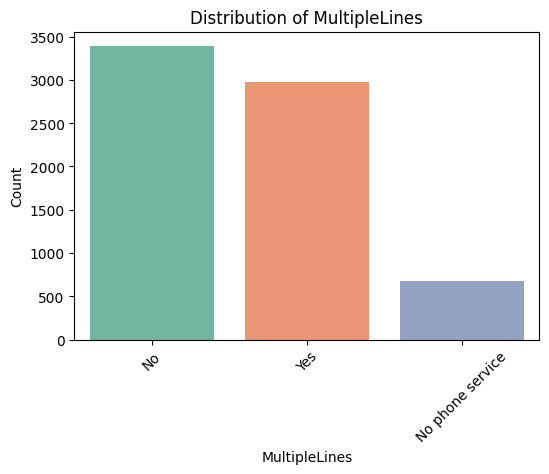

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


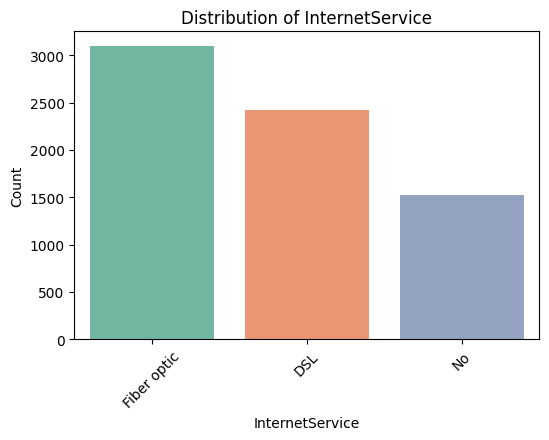

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


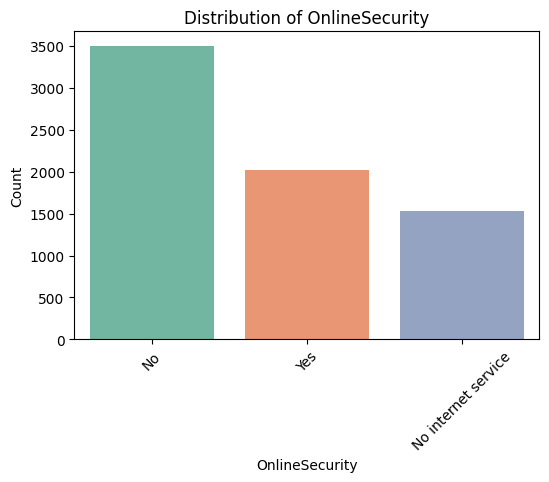

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


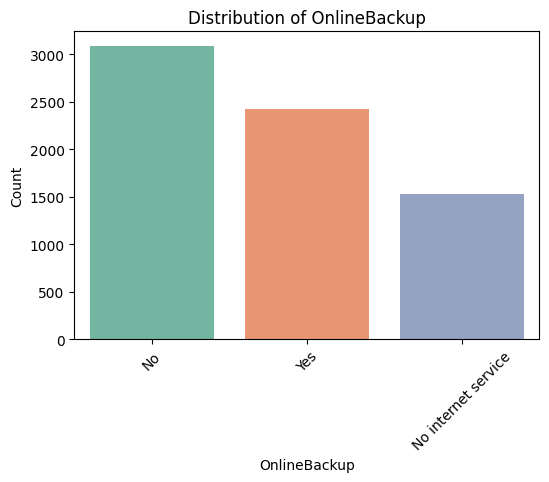

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


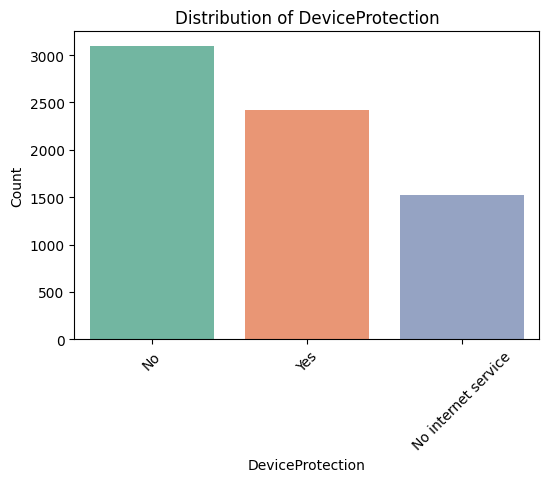

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


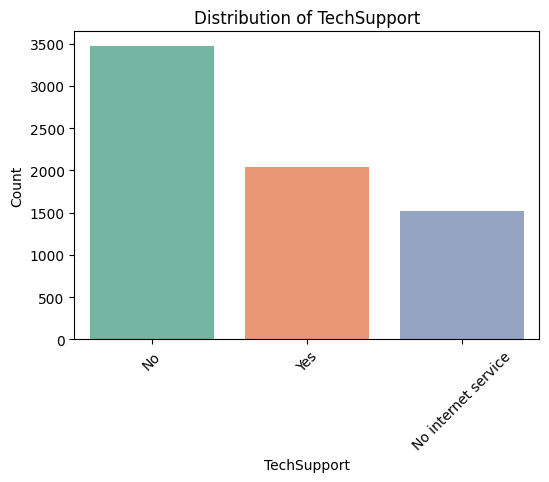

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


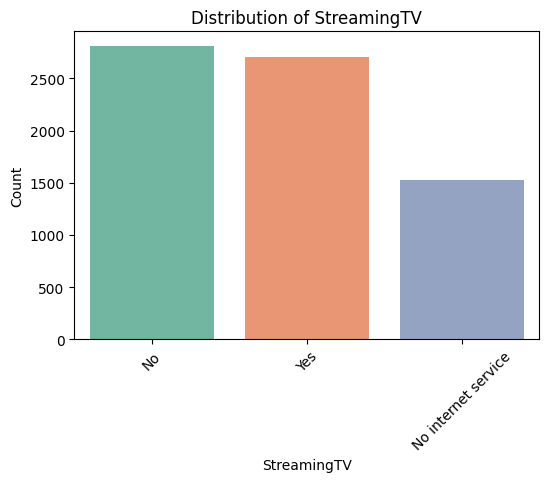

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


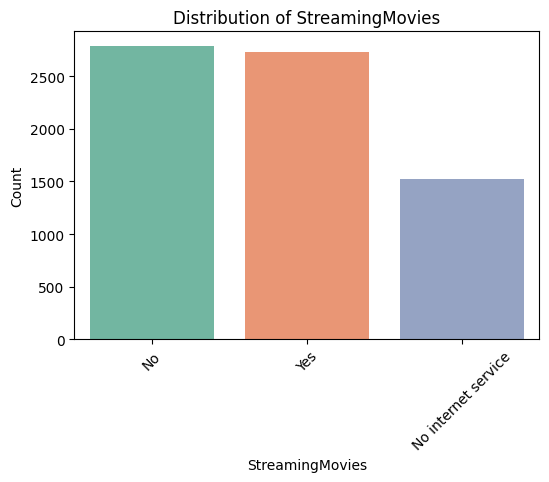

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


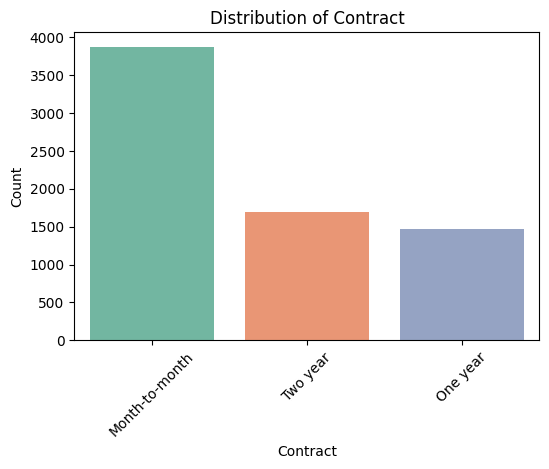

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


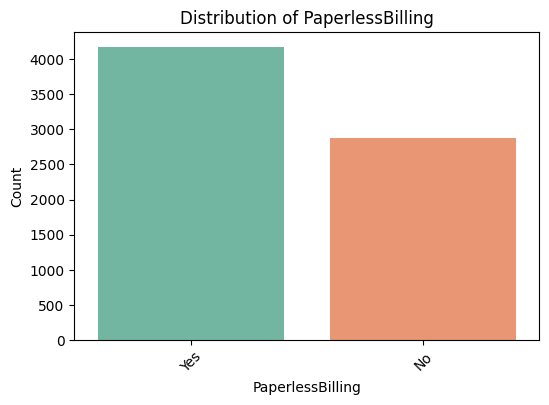

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


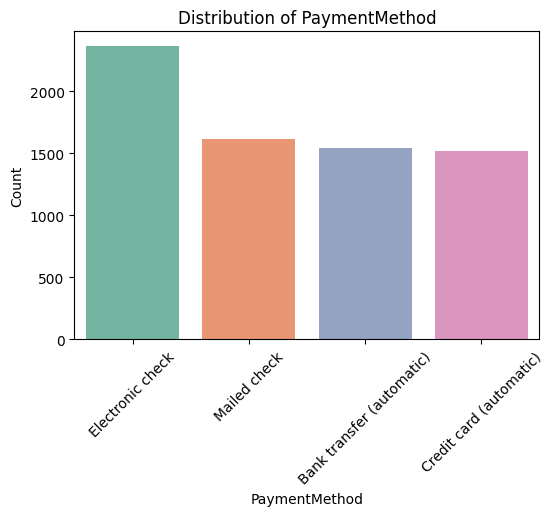

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


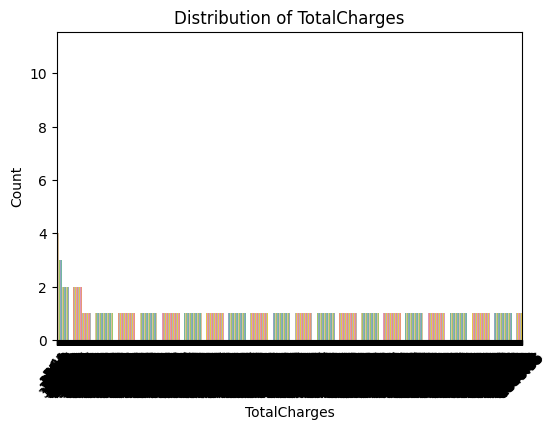

<ipython-input-36-fd6288ede7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)


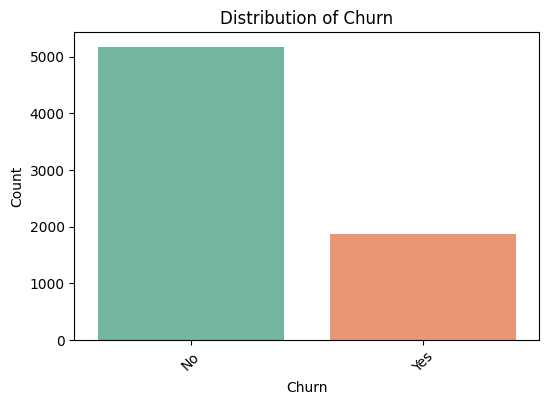

In [ ]:
# Categorical feature analysis
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df, palette='Set2', order=df[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

no numeric columns with high correation

In [ ]:
# PREPROCESSING:
# clean df:

scaler = MinMaxScaler()

# remove columns that are almost constants
df = df[[col for col in df.columns if df[col].nunique() <= 7000]]


# fill na  for numerical and categorical columns
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(exclude='number').columns
df.loc[:, numerical_columns] = df[numerical_columns].astype(float)

df.loc[:, numerical_columns] = df[numerical_columns].fillna(0.0)
df.loc[:, categorical_columns] = df[categorical_columns].fillna('')

clean_df = df.copy()

# encode daata
for col in categorical_columns:
    unique_values = df[col].dropna().unique()
    if len(unique_values) == 2:
        value_map = {unique_values[0]: 0, unique_values[1]: 1}
        df.loc[:, col] = df[col].map(value_map)
    else:
        encoder = LabelEncoder()
        df.loc[:, col] = encoder.fit_transform(df[col])

# scale data: normalization
df.loc[:, numerical_columns] = scaler.fit_transform(df[numerical_columns])

df['Churn'] = df['Churn'].astype(int)
df.head()

<ipython-input-6-d5e96d42e3ba>:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.01388889 0.47222222 0.02777778 ... 0.15277778 0.05555556 0.91666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, numerical_columns] = scaler.fit_transform(df[numerical_columns])
<ipython-input-6-d5e96d42e3ba>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].astype(int)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0.013889,0,1,0,0,2,0,0,0,0,0,0,2,0.115423,2505,0
1,1,0,1,0,0.472222,1,0,0,2,0,2,0,0,0,1,1,3,0.385075,1466,0
2,1,0,1,0,0.027778,1,0,0,2,2,0,0,0,0,0,0,3,0.354229,157,1
3,1,0,1,0,0.625000,0,1,0,2,0,2,2,0,0,1,1,0,0.239303,1400,0
4,0,0,1,0,0.027778,1,0,1,0,0,0,0,0,0,0,0,2,0.521891,925,1


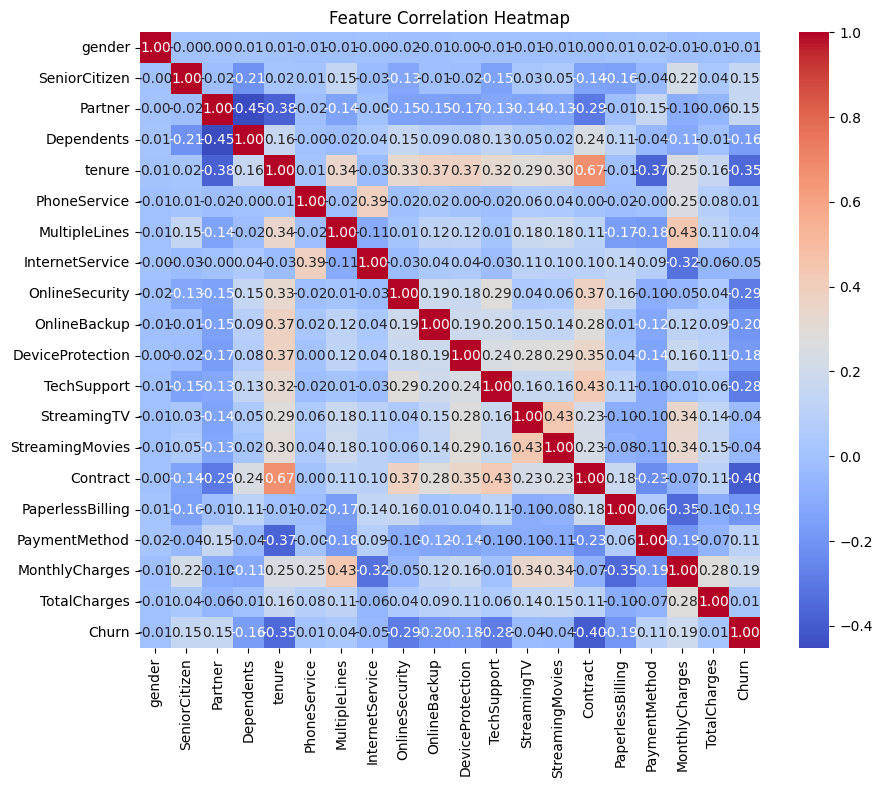

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
print(f"Columns with correlations > 0.9:")
print(high_corr_pairs)

Columns with correlations > 0.9:
[]


In [ ]:
correlations = df.corr()["Churn"]
low_corr_columns = correlations[abs(correlations) < 0.01].index.tolist()
print(f"Columns with correlation to Churn < 0.01:")
print(low_corr_columns)

Columns with correlation to Churn < 0.01:
['gender']


In [ ]:
df = df.drop(columns=low_corr_columns, axis=1)

In [ ]:
# basic data splits:
test_size = 0.2

train_val_df, test_df = train_test_split(df, test_size=test_size, random_state=RANDOM_SEED)

x_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn']

train_df, val_df = train_test_split(train_val_df, test_size=test_size, random_state=RANDOM_SEED)

x_train = train_df.drop(columns=['Churn'])
y_train = train_df['Churn']

# data balancing for training
smote = SMOTE(sampling_strategy=1.0, random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


x_val = val_df.drop(columns=['Churn'])
y_val = val_df['Churn']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Classic Model:

In [ ]:
# decision tree
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(x_train, y_train)

y_train_pred = base_model.predict(x_train)
print("Validation Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nValidation Classification Report:\n", classification_report(y_train, y_train_pred))
print('--------------------------------------------------------')
y_val_pred = base_model.predict(x_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print('--------------------------------------------------------')
y_test_pred = base_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Accuracy: 0.9987937273823885

Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3316
           1       1.00      1.00      1.00      3316

    accuracy                           1.00      6632
   macro avg       1.00      1.00      1.00      6632
weighted avg       1.00      1.00      1.00      6632

--------------------------------------------------------
Validation Accuracy: 0.7338065661047027

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       822
           1       0.51      0.48      0.49       305

    accuracy                           0.73      1127
   macro avg       0.66      0.65      0.66      1127
weighted avg       0.73      0.73      0.73      1127

--------------------------------------------------------
Test Accuracy: 0.7310149041873669

Test Classification Report:
               pr

Hyper parameters Classic Model:

In [ ]:
# best decision found by tuninng hyper params:

param_grid = {
    'max_depth': [10, 20, 30,],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['sqrt', 'log2', None],
    # 'criterion': ['gini', 'entropy'],
    # 'splitter': ['best', 'random'],
}

optimized_model = DecisionTreeClassifier(random_state=RANDOM_SEED)

model_random = RandomizedSearchCV(
    estimator=optimized_model,
    param_distributions=param_grid,
    random_state=RANDOM_SEED,
)

model_random.fit(x_train, y_train)

print("Best Parameters for DecisionTreeClassifier:", model_random.best_params_)
print('--------------------------------------------------------')
best_base_model = model_random.best_estimator_

y_train_pred = best_base_model.predict(x_train)
print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))
print('--------------------------------------------------------')
y_val_pred = best_base_model.predict(x_val)
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print('--------------------------------------------------------')
y_test_pred = best_base_model.predict(x_test)
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Best Parameters for DecisionTreeClassifier: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
--------------------------------------------------------

Train Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      3316
           1       0.87      0.88      0.88      3316

    accuracy                           0.88      6632
   macro avg       0.88      0.88      0.88      6632
weighted avg       0.88      0.88      0.88      6632

--------------------------------------------------------

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       822
           1       0.57      0.61      0.59       305

    accuracy                           0.77      1127
   macro avg       0.71      0.72      0.72      1127
weighted avg       0.78      0.77      0.77      1127

-------------------------------------------------------

Neural Network:

In [ ]:
# basic NN:
threshold = 0.4

base_deep_model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

base_deep_model.compile(loss='binary_crossentropy')

base_deep_model.fit(x_train, y_train,
                    validation_data=(x_val, y_val))


y_train_pred = (base_deep_model.predict(x_train) > threshold).astype(int)
print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))
print('--------------------------------------------------------')
y_val_pred = (base_deep_model.predict(x_val) > threshold).astype(int)
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print('--------------------------------------------------------')
y_test_pred = (base_deep_model.predict(x_test) > threshold).astype(int)
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

208/208 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 25.4236 - val_loss: 18.6068
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Train Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      3316
           1       1.00      0.00      0.00      3316

    accuracy                           0.50      6632
   macro avg       0.75      0.50      0.33      6632
weighted avg       0.75      0.50      0.33      6632

--------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       822
           1       0.00      0.00      0.00       305

    accuracy                           0.73      1127
   macro avg       0.36      0.50      0.42      1127
weighted avg       0.53      0.73      0.61      1127

--------------------------------------------------------
45/45 ━━

In [ ]:
# basic NN with dropout:

base_deep_model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')

])

base_deep_model.compile(loss='binary_crossentropy')

base_deep_model.fit(x_train, y_train,
                    validation_data=(x_val, y_val))


y_train_pred = (base_deep_model.predict(x_train) > threshold).astype(int)
print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))
print('--------------------------------------------------------')
y_val_pred = (base_deep_model.predict(x_val) > threshold).astype(int)
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print('--------------------------------------------------------')
y_test_pred = (base_deep_model.predict(x_test) > threshold).astype(int)
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 25.2857 - val_loss: 0.6919
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.01      0.02      3316
           1       0.50      1.00      0.67      3316

    accuracy                           0.50      6632
   macro avg       0.74      0.50      0.34      6632
weighted avg       0.74      0.50      0.34      6632

--------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.01      0.02       822
           1       0.27      1.00      0.43       305

    accuracy                           0.28      1127
   macro avg       0.57      0.50      0.22      1127
weighted avg       0.71      0.28      0.13      1127

--------------------------------------------------------
45/45 ━━━

In [ ]:
# basic NN variations - change regularization by variations of drop rates:


for drop_rate in [0.1, 0.3, 0.5]:
  base_deep_model_2 = Sequential([
      Input(shape=(x_train.shape[1],)),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dropout(drop_rate),
      Dense(1, activation='sigmoid')
  ])

  base_deep_model.compile(loss='binary_crossentropy')

  base_deep_model.fit(x_train, y_train,
                      validation_data=(x_val, y_val))

  print(f"Drop Rate = {drop_rate}")
  y_train_pred = (base_deep_model.predict(x_train) > threshold).astype(int)
  print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))
  print('--------------------------------------------------------')
  y_val_pred = (base_deep_model.predict(x_val) > threshold).astype(int)
  print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
  print('--------------------------------------------------------')
  y_test_pred = (base_deep_model.predict(x_test) > threshold).astype(int)
  print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2068 - val_loss: 0.6945
Drop Rate = 0.1
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Train Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.01      0.03      3316
           1       0.50      1.00      0.67      3316

    accuracy                           0.51      6632
   macro avg       0.68      0.51      0.35      6632
weighted avg       0.68      0.51      0.35      6632

--------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.01      0.02       822
           1       0.27      0.99      0.43       305

    accuracy                           0.28      1127
   macro avg       0.55      0.50      0.23      1127
weighted avg       0.68      0.28      0.13      1127

---------------------------------------------------

In [ ]:
# basic NN variations - change first dense unites:


for layer_unites in [64, 128, 256]:
  base_deep_model_2 = Sequential([
      Input(shape=(x_train.shape[1],)),
      Dense(layer_unites, activation='relu'),
      Dense(64, activation='relu'),
      Dropout(drop_rate),
      Dense(1, activation='sigmoid')
  ])

  base_deep_model.compile(loss='binary_crossentropy')

  base_deep_model.fit(x_train, y_train,
                      validation_data=(x_val, y_val))

  print(f"Drop Rate = {drop_rate}")
  y_train_pred = (base_deep_model.predict(x_train) > threshold).astype(int)
  print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))
  print('--------------------------------------------------------')
  y_val_pred = (base_deep_model.predict(x_val) > threshold).astype(int)
  print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
  print('--------------------------------------------------------')
  y_test_pred = (base_deep_model.predict(x_test) > threshold).astype(int)
  print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.8179 - val_loss: 0.6134
Drop Rate = 0.5
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Train Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.64      0.56      3316
           1       0.50      0.36      0.42      3316

    accuracy                           0.50      6632
   macro avg       0.50      0.50      0.49      6632
weighted avg       0.50      0.50      0.49      6632

--------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.69       822
           1       0.28      0.37      0.32       305

    accuracy                           0.58      1127
   macro avg       0.51      0.51      0.51      1127
weighted avg       0.61      0.58      0.59      1127

---------------------------------------------------

In [ ]:
# basic NN variations - change learning_rate:

for lr in [0.01, 0.001, 0.0001]:
  base_deep_model_2 = Sequential([
      Input(shape=(x_train.shape[1],)),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dropout(0.3),
      Dense(1, activation='sigmoid')
  ])

  base_deep_model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy')

  base_deep_model.fit(x_train, y_train,
                      validation_data=(x_val, y_val))

  print(f"Learning rate Rate = {lr}")
  y_train_pred = (base_deep_model.predict(x_train) > threshold).astype(int)
  print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))
  print('--------------------------------------------------------')
  y_val_pred = (base_deep_model.predict(x_val) > threshold).astype(int)
  print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
  print('--------------------------------------------------------')
  y_test_pred = (base_deep_model.predict(x_test) > threshold).astype(int)
  print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.4602 - val_loss: 0.7064
Learning rate Rate = 0.01
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.02      3316
           1       0.50      1.00      0.67      3316

    accuracy                           0.50      6632
   macro avg       0.75      0.50      0.34      6632
weighted avg       0.75      0.50      0.34      6632

--------------------------------------------------------
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.01      0.01       822
           1       0.27      0.99      0.43       305

    accuracy                           0.27      1127
   macro avg       0.51      0.50      0.22      1127
weighted avg       0.62      0.27      0.13      1127

-----------------------------------------

---------------

In [ ]:
import numpy as np
import itertools

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30]
}

# Perform manual search
best_model = None
best_params = None
best_score = -np.inf  # Initialize to negative infinity
results = []

# Iterate over all combinations of hyperparameters
for learning_rate, batch_size, epochs in itertools.product(
    param_grid['learning_rate'],
    param_grid['batch_size'],
    param_grid['epochs']
):
    print(f"Testing combination: LR={learning_rate}, Batch Size={batch_size}, Epochs={epochs}")

    # Create the model
    model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        verbose=1
    )

    # Evaluate on validation set
    val_accuracy = history.history['val_accuracy'][-1]
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    results.append((learning_rate, batch_size, epochs, val_accuracy))

    # Update best model if the current one performs better
    if val_accuracy > best_score:
        best_score = val_accuracy
        best_model = model
        best_params = (learning_rate, batch_size, epochs)

# Report the best parameters and results
print("\nBest Hyperparameters:")
print(f"Learning Rate: {best_params[0]}, Batch Size: {best_params[1]}, Epochs: {best_params[2]}")
print(f"Best Validation Accuracy: {best_score:.4f}")

# Evaluate the best model on test data
y_test_pred = (best_model.predict(x_test) > 0.5).astype(int)
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Testing combination: LR=0.01, Batch Size=16, Epochs=10
Epoch 1/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5031 - loss: 49.3586 - val_accuracy: 0.2724 - val_loss: 0.7056
Epoch 2/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5121 - loss: 0.6913 - val_accuracy: 0.2751 - val_loss: 0.7278
Epoch 3/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4999 - loss: 0.6917 - val_accuracy: 0.2733 - val_loss: 0.7248
Epoch 4/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5055 - loss: 0.6909 - val_accuracy: 0.2742 - val_loss: 0.7235
Epoch 5/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5005 - loss: 0.6898 - val_accuracy: 0.2751 - val_loss: 0.7212
Epoch 6/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4987 - loss: 0.6898 - val_accuracy: 0.2751 - val_loss: 0.7429
Epoch 7/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4885 - loss: 0.6990 - val_accuracy: 0.2742 - val_loss: 0.7456
Epoch 8/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

In [ ]:
print("\nBest Hyperparameters:")
print(f"Learning Rate: {best_params[0]}, Batch Size: {best_params[1]}, Epochs: {best_params[2]}")


Best Hyperparameters:
Learning Rate: 0.0001, Batch Size: 32, Epochs: 10


In [ ]:
# best version by hyper parameters optimization:

best_learning_rate, best_batch_size, best_epochs = best_params

model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate=best_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# making the training data heavly skewed toward target = 1
only_churn = train_df[train_df['Churn'] == 1]
x_train_churn_1 = only_churn.drop(columns=['Churn'])
y_train_churn_1 = only_churn['Churn']

history = model.fit(
    x_train_churn_1, y_train_churn_1,
    validation_data=(x_val, y_val),
    batch_size=best_batch_size,
    epochs=best_epochs,
    verbose=1
)

y_train_pred = (model.predict(x_train_churn_1) > threshold).astype(int)
print("\Train Classification Report:\n", classification_report(y_train_churn_1, y_train_pred))
print('--------------------------------------------------------')
y_val_pred = (model.predict(x_val) > threshold).astype(int)
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print('--------------------------------------------------------')
y_test_pred = (model.predict(x_test) > threshold).astype(int)
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6951 - loss: 52.0144 - val_accuracy: 0.2715 - val_loss: 223.8428
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9180 - loss: 7.6284 - val_accuracy: 0.2724 - val_loss: 299.3506
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9664 - loss: 3.5067 - val_accuracy: 0.2724 - val_loss: 346.6125
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9766 - loss: 2.2162 - val_accuracy: 0.2724 - val_loss: 374.7829
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9918 - loss: 0.6625 - val_accuracy: 0.2724 - val_loss: 384.2007
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9863 - loss: 0.7534 - val_accuracy: 0.2724 - val_loss: 395.5255
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9830 - loss: 1.1518 - val_accuracy: 0.2715 - val_loss: 413.7929
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.3002 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1036
           1       0.26      1.00      0.42       373

    accuracy                           0.26      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.26      0.11      1409



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# best version by hyper parameters optimization:
model = Sequential([
        Input(shape=(x_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate=best_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

class_0 = train_df[train_df['Churn'] == 0]
class_1 = train_df[train_df['Churn'] == 1]

# detect outliers
iso = IsolationForest(contamination=0.2, random_state=42)
# Detect outliers for each class
class_0_outliers = iso.fit_predict(class_0.drop(columns=['Churn']))
class_1_outliers = iso.fit_predict(class_1.drop(columns=['Churn']))

# Filter out outliers (keep only non-outliers, i.e., where prediction == 1)
class_0_cleaned = class_0[class_0_outliers == 1]
class_1_cleaned = class_1[class_1_outliers == 1]

# Combine cleaned subsets
cleaned_training_df = pd.concat([class_0_cleaned, class_1_cleaned])

# Separate features and labels
x_train_cleaned = cleaned_training_df.drop(columns=['Churn'])
y_train_cleaned = cleaned_training_df['Churn']

history = model.fit(
    x_train_cleaned, y_train_cleaned,
    validation_data=(x_val, y_val),
    batch_size=best_batch_size,
    epochs=best_epochs,
    verbose=1
)

y_train_pred = (model.predict(x_train_cleaned) > threshold).astype(int)
print("\Train Classification Report:\n", classification_report(y_train_cleaned, y_train_pred))
print('--------------------------------------------------------')
y_val_pred = (model.predict(x_val) > threshold).astype(int)
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print('--------------------------------------------------------')
y_test_pred = (model.predict(x_test) > threshold).astype(int)
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6607 - loss: 89.0342 - val_accuracy: 0.7294 - val_loss: 31.8396
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6306 - loss: 45.1901 - val_accuracy: 0.7303 - val_loss: 19.3354
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5998 - loss: 33.8528 - val_accuracy: 0.7303 - val_loss: 11.3025
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5904 - loss: 20.5098 - val_accuracy: 0.7303 - val_loss: 8.6284
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 9.6578 - val_accuracy: 0.7303 - val_loss: 2.4951
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6216 - loss: 5.0771 - val_accuracy: 0.7303 - val_loss: 0.8545
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6341 - loss: 1.8703 - val_accuracy: 0.7311 - val_loss: 0.6005
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6364 - loss: 0.8888 - val_accu

a small downrage in recall of class 0 but small improvments in precision in both calsses and the recall of class 1

In [ ]:
# best version with different sampaling ratios:

smote_ratios = [0.5, 0.75, 1.0]  # 0.5: 1 minority to 2 majority, 1.0: equal, 2.0: 2 minority to 1 majority
original_x_train = train_df.drop(columns=['Churn'])
original_y_train = train_df['Churn']

for smote_ratio in smote_ratios:

  smote = SMOTE(sampling_strategy=smote_ratio, random_state=42)
  smote_x_train, smote_y_train = smote.fit_resample(original_x_train, original_y_train)

  smote_model = Sequential([
          Input(shape=(x_train.shape[1],)),
          Dense(128, activation='relu'),
          Dense(64, activation='relu'),
          Dropout(0.3),
          Dense(1, activation='sigmoid')
      ])

  optimizer = Adam(learning_rate=best_learning_rate)
  smote_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = smote_model.fit(
    smote_x_train, smote_y_train,
    validation_data=(x_val, y_val),
    batch_size=best_batch_size,
    epochs=best_epochs,
    verbose=1
  )

  print(f"Learning rate Rate = {lr}")
  y_train_pred = (smote_model.predict(x_train) > threshold).astype(int)
  print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))
  print('--------------------------------------------------------')
  y_val_pred = (smote_model.predict(x_val) > threshold).astype(int)
  print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
  print('--------------------------------------------------------')
  y_test_pred = (smote_model.predict(x_test) > threshold).astype(int)
  print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5460 - loss: 69.0833 - val_accuracy: 0.7303 - val_loss: 13.3120
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5634 - loss: 34.9762 - val_accuracy: 0.7294 - val_loss: 3.9662
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5535 - loss: 15.2873 - val_accuracy: 0.6371 - val_loss: 0.6465
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5769 - loss: 4.3138 - val_accuracy: 0.7267 - val_loss: 0.6306
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5686 - loss: 1.0333 - val_accuracy: 0.7285 - val_loss: 0.5909
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6621 - loss: 0.6513 - val_accuracy: 0.7285 - val_loss: 0.6276
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6801 - loss: 0.6560 - val_accuracy: 0.7294 - val_loss: 0.6157
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6610 - loss: 0.6584 - val_accuracy: 0.7294 -

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5246 - loss: 77.4707 - val_accuracy: 0.7294 - val_loss: 9.1767
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5106 - loss: 27.8248 - val_accuracy: 0.2768 - val_loss: 9.2428
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4884 - loss: 10.3363 - val_accuracy: 0.2795 - val_loss: 0.7822
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4978 - loss: 2.1273 - val_accuracy: 0.7285 - val_loss: 0.6481
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5449 - loss: 0.6890 - val_accuracy: 0.7267 - val_loss: 0.6704
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5778 - loss: 0.6870 - val_accuracy: 0.7249 - val_loss: 0.6545
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5787 - loss: 0.6852 - val_accuracy: 0.7276 - val_loss: 0.6627
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5761 - loss: 0.6840 - val_accuracy: 0.7311 - 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5117 - loss: 64.9029 - val_accuracy: 0.7294 - val_loss: 2.0460
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4956 - loss: 31.2420 - val_accuracy: 0.3665 - val_loss: 2.3106
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5164 - loss: 8.0306 - val_accuracy: 0.3319 - val_loss: 0.8169
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5093 - loss: 0.7176 - val_accuracy: 0.7152 - val_loss: 0.6741
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5300 - loss: 0.6870 - val_accuracy: 0.3478 - val_loss: 0.6849
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5238 - loss: 0.6883 - val_accuracy: 0.6779 - val_loss: 0.6674
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5553 - loss: 0.6824 - val_accuracy: 0.5563 - val_loss: 0.6671
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5377 - loss: 0.6895 - val_accuracy: 0.7320 - va

by sampaling to get a more even typed training data we get better results even when not reaching 1:1: ratio.

In [ ]:
# suggest a architectural change:
from tensorflow.keras.layers import LeakyReLU

leakyrelu_model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=best_learning_rate)
leakyrelu_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = leakyrelu_model.fit(
  x_train, y_train,
  validation_data=(x_val, y_val),
  batch_size=best_batch_size,
  epochs=best_epochs,
  verbose=1
)

y_train_pred = (leakyrelu_model.predict(x_train) > threshold).astype(int)
print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))
print('--------------------------------------------------------')
y_val_pred = (leakyrelu_model.predict(x_val) > threshold).astype(int)
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print('--------------------------------------------------------')
y_test_pred = (leakyrelu_model.predict(x_test) > threshold).astype(int)
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4957 - loss: 131.6038 - val_accuracy: 0.7294 - val_loss: 1.5950
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5027 - loss: 40.9713 - val_accuracy: 0.3789 - val_loss: 0.9919
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5002 - loss: 13.8535 - val_accuracy: 0.7400 - val_loss: 0.5663
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5096 - loss: 4.7600 - val_accuracy: 0.7311 - val_loss: 0.8652
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5284 - loss: 1.7180 - val_accuracy: 0.4907 - val_loss: 0.6942
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5172 - loss: 0.8396 - val_accuracy: 0.6610 - val_loss: 0.6459
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5336 - loss: 0.7553 - val_accuracy: 0.7329 - val_loss: 0.5838
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5487 - loss: 0.7256 - val_accuracy: 0.7436 - 

Dim reduction:

In [ ]:
# PCA from dimintion reduction
x = df.drop(columns=['Churn'])
y = df['Churn']


# data balancing for training
smote = SMOTE(sampling_strategy=1.0, random_state=42)
smote_x_train, smote_y_train = smote.fit_resample(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


        PC1       PC2  Churn
0 -2.026515 -0.706574      0
1 -0.888234 -1.916913      0
2 -2.252184 -1.002452      1
3  0.644746 -2.494736      0
4 -3.040023  0.010563      1


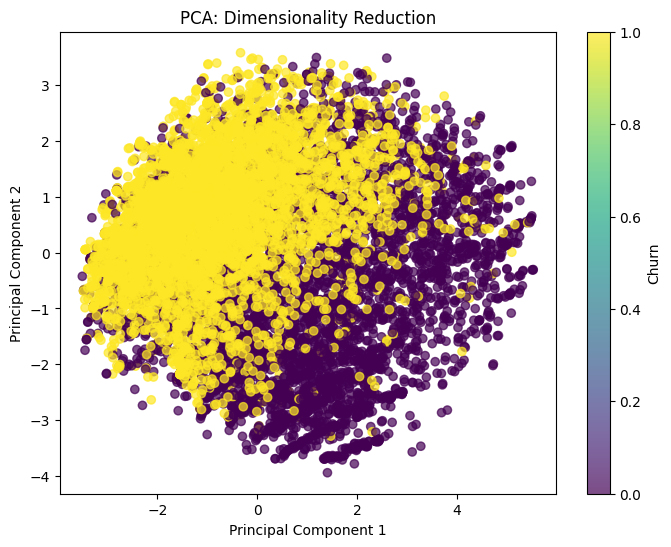

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(smote_x_train)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Churn'] = smote_y_train

print(pca_df.head())
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Churn'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Churn')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Dimensionality Reduction')
plt.show()

In [ ]:
# basic split on PCAed data
test_size = 0.2

pca_train_val_df, pca_test_df = train_test_split(pca_df, test_size=test_size, random_state=RANDOM_SEED)

pca_x_test = pca_test_df.drop(columns=['Churn'])
pca_y_test = pca_test_df['Churn']


pca_train_df, pca_val_df = train_test_split(pca_train_val_df, test_size=test_size, random_state=RANDOM_SEED)

pca_x_train = pca_train_df.drop(columns=['Churn'])
pca_y_train = pca_train_df['Churn']


pca_x_val = pca_val_df.drop(columns=['Churn'])
pca_y_val = pca_val_df['Churn']

In [ ]:
# basic NN with PCA data

base_deep_model = Sequential([
    Input(shape=(pca_x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

base_deep_model.compile(loss='binary_crossentropy')

base_deep_model.fit(pca_x_train, pca_y_train)


pca_y_train_pred = (base_deep_model.predict(pca_x_train) > threshold).astype(int)
print("\Train Classification Report:\n", classification_report(pca_y_train, pca_y_train_pred))
print('--------------------------------------------------------')
pca_y_val_pred = (base_deep_model.predict(pca_x_val) > threshold).astype(int)
print("\nValidation Classification Report:\n", classification_report(pca_y_val, pca_y_val_pred))
print('--------------------------------------------------------')
pca_y_test_pred = (base_deep_model.predict(pca_x_test) > threshold).astype(int)
print("\nTest Classification Report:\n", classification_report(pca_y_test, pca_y_test_pred))

207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5369
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
\Train Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71      3331
           1       0.69      0.87      0.77      3291

    accuracy                           0.74      6622
   macro avg       0.76      0.74      0.74      6622
weighted avg       0.76      0.74      0.74      6622

--------------------------------------------------------
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69       822
           1       0.69      0.87      0.77       834

    accuracy                           0.74      1656
   macro avg       0.75      0.73      0.73      1656
weighted avg       0.75      0.74      0.73      1656

--------------------------------------------------------
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s